In [1]:
import numpy as np
import datasets
import solvers
import time
import matplotlib
matplotlib.use('Agg');
import matplotlib.pyplot as plt
plt.set_cmap('jet');
%matplotlib inline

In [2]:
reload(datasets)
reload(solvers)

errorss = []

solvers_list = [solvers.DifferentialEvolution(strategy="best1bin",max_h=90),
                solvers.Random(num_tries=10000, max_h=10),
                solvers.ISTA(),
                solvers.ISTA_NN(),
                solvers.OrthogonalMatchingPursuit(),
                solvers.ISTA_NN(0.001,50.0),
                solvers.NMF(),
                solvers.NMF(beta_loss="kullback-leibler", solver="mu"),
                solvers.BVLS(max_h=90),
                solvers.Random(num_tries=1000, max_h=90),
                solvers.SparsePseudoInverse(),
                solvers.LassoCoordinateDescent(alpha=0.01)
               ]

for solver in solvers_list:
    errors = []
    for i in range(30):

        dataset = datasets.NoisySparseRandomDataset(n_in=5, n_out=30, sparsity=0.2, noise=i)

        hp = solver.solve(dataset.get_D(),dataset.get_signals())
        hp = np.maximum(hp,0)

        l1 = np.abs((dataset.get_h() - hp)).mean()
        l2 = (((dataset.get_h() - hp))**2).mean()
        
        errors.append(l2)
        #print str(i) + " - l1:" + "%7.3f"%l1 + " l2:%7.3f"%l2 + " - " + str(dataset) + " " + str(solver)
    errorss.append(errors)
    print("")

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/omp.py:657: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


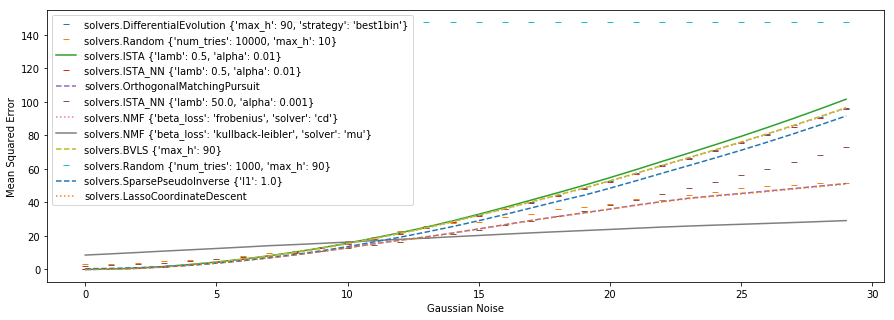

In [3]:
plt.rcParams['figure.figsize'] = (15, 5)
linestyles = ['_', '-', '--', ':']
for lines in errorss:
    plt.plot(lines,np.random.choice(linestyles))
plt.legend([str(e) for e in solvers_list])
plt.xlabel("Gaussian Noise");
plt.ylabel("Mean Squared Error");

In [4]:
errors = []
for i in range(1000):
    dataset = datasets.NoisyRandomDataset(n_in=5, n_out=30, noise=30)
    solver = solvers.ISTA_NN(0.001,i)
    hp = solver.solve(dataset.get_D(),dataset.get_signals())
    hp = np.maximum(hp,0)

    l1 = np.abs((dataset.get_h() - hp)).mean()
    l2 = (((dataset.get_h() - hp))**2).mean()
    errors.append(l2)


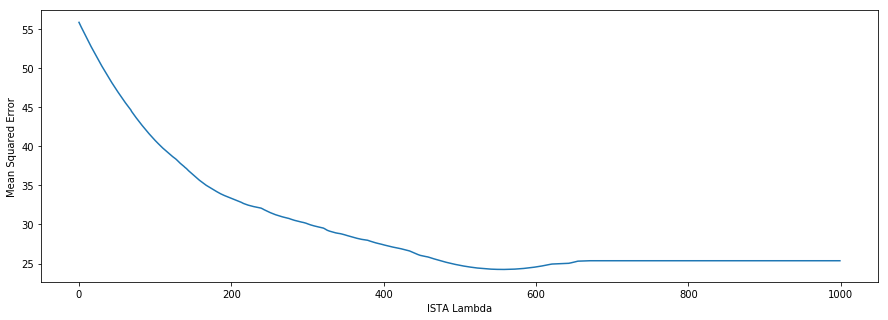

In [5]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(errors)

plt.xlabel("ISTA Lambda");
plt.ylabel("Mean Squared Error");

transcript_prior= [0 1 0 1 0 0]


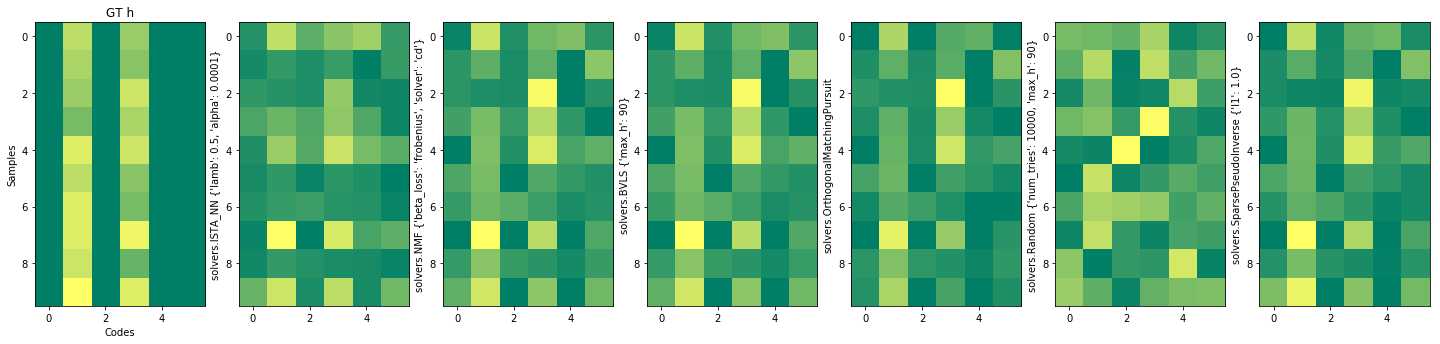

In [6]:
plt.rcParams['figure.figsize'] = (25, 6)

solvers_list = [#solvers.DifferentialEvolution(strategy="best1bin",max_h=90),
                #solvers.ISTA(alpha=0.0001),
                solvers.ISTA_NN(alpha=0.0001),
                solvers.NMF(),
                #solvers.NMF(beta_loss="kullback-leibler", solver="mu"),
                solvers.BVLS(max_h=90),
                solvers.OrthogonalMatchingPursuit(),
                #solvers.OrthogonalMatchingPursuit2(max_h=30),
                solvers.Random(num_tries=10000, max_h=90),
                solvers.SparsePseudoInverse()
               ]

dataset = datasets.NoisySparseRandomDataset(n_in=6, n_out=30, noise=10, transcript_prior="fixed")

plt.subplot(1,len(solvers_list)+1,1)
plt.imshow(dataset.get_h(), cmap="summer")
plt.xlabel("Codes")
plt.ylabel("Samples")
plt.title("GT h")

for i, solver in enumerate(solvers_list):
    
    hp = solver.solve(dataset.get_D(),dataset.get_signals())
    hp = np.maximum(hp,0)
    
    plt.subplot(1,len(solvers_list)+1,i+2)
    plt.imshow(hp, cmap="summer")
    plt.ylabel(solver)
